In [2]:
%cd ..

/mnt/c/python_codes/LearnKalmanGain


In [29]:
import sys
import os
import numpy as np
import torch

from utils import etd_rk4_wrapper,custom_int
import matplotlib.pyplot as plt

from dapper.mods.KS import Model as DapperKS

In [32]:
t = torch.arange(0, 1, 0.01)
dt = t[1] - t[0]
print(dt/2)

tensor(0.0050)


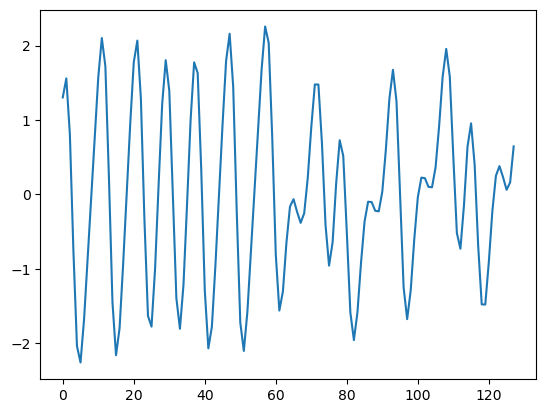

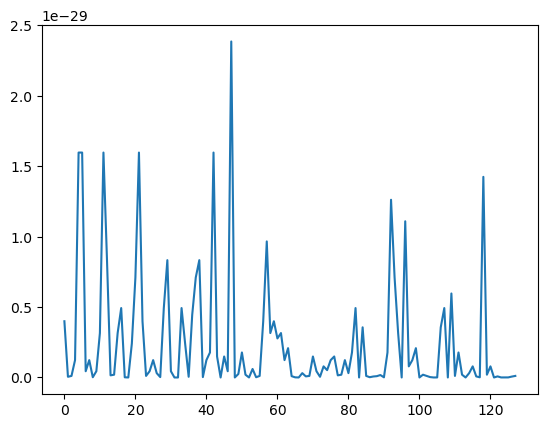

In [ ]:
num_instances = 100

# Generate 100 instances of KS and collect x0 values
x0_values = np.array([DapperKS(dt=0.25).x0 for _ in range(num_instances)])

# Compute the mean of x0 across the 100 instances
x0_mean = np.mean(x0_values, axis=0)
x0_var = np.var(x0_values, axis=0)

# Display the result
plt.plot(x0_mean)
plt.show()

plt.plot(x0_var)
plt.show()

In [25]:
def get_v0():

    dt = 1
    dt_iter = 4

    model = etd_rk4_wrapper(device=None, dt=dt / dt_iter)
    grid = 32 * np.pi * torch.linspace(0, 1, 128 + 1, dtype=torch.float32)[1:]  # Ensure float32
    x0_Kassam = torch.cos(grid / 16) * (1 + torch.sin(grid / 16))
    x0 = x0_Kassam.clone().unsqueeze(0)
    # Single 150-step integration to stabilize x0
    x0 = custom_int(x0, model, 10, dt, dt_iter)[-1:].to(dtype=torch.float32)  # Ensure float32
    # default_v0 = custom_int(x0, model, 10 ** 3, dt, dt_iter)[-1:].to(dtype=torch.float32)  # Ensure float32
    default_v0 = x0
    
    return default_v0

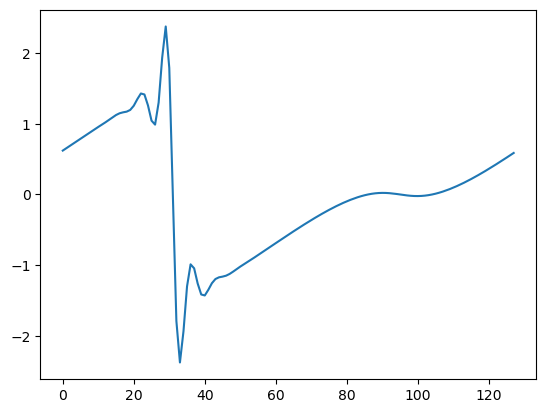

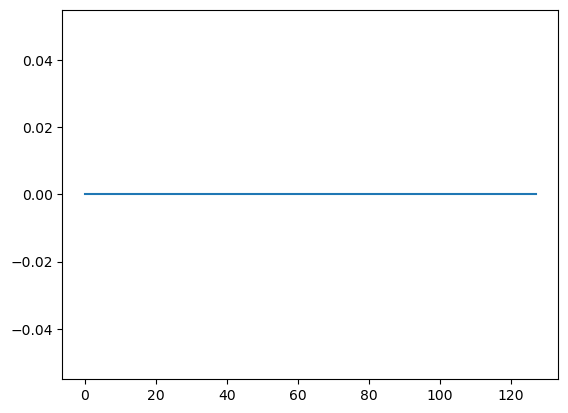

In [26]:
num_instances = 100

# Generate 100 instances of KS and collect x0 values
x0_values = torch.cat([get_v0() for _ in range(num_instances)])

# Compute the mean of x0 across the 100 instances
x0_mean = torch.mean(x0_values, dim=0)
x0_var = torch.var(x0_values, dim=0)

# Display the result
plt.plot(x0_mean)
plt.show()

plt.plot(x0_var)
plt.show()